In [1]:
from mqt.yaqs.core.data_structures.networks import MPS, MPO
from mqt.yaqs import simulator
from mqt.yaqs.core.data_structures.simulation_parameters import AnalogSimParams, Observable
from mqt.yaqs.core.libraries.gate_library import X, Z, RuntimeCost
from mqt.yaqs.core.data_structures.noise_model import NoiseModel

import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
def tdvp_simulator(H_0, noise_model, state=None):
    L = H_0.length
    sample_timesteps = True
    num_traj = 10
    max_bond_dim = 2**L
    min_bond_dim = 2
    threshold = 1e-6
    order = 1
    dt = 0.1

    # Ising
    # elapsed_time = 5
    # state = MPS(length=L)

    # Heisenberg
    elapsed_time = 2
    state = MPS(length=L, state="Neel")

    measurements = [Observable("max_bond")]
    sim_params = AnalogSimParams(measurements, elapsed_time, dt, num_traj, max_bond_dim, min_bond_dim, threshold, order, sample_timesteps=sample_timesteps)
    simulator.run(state, H_0, sim_params, noise_model=noise_model)

    return sim_params.observables[0].results

In [3]:
L_list = [12, 20]
for L in L_list:
    print(L)
    J = 1
    h = 1
    H_0 = MPO()
    # H_0.init_ising(L, J, h)
    H_0.init_heisenberg(L, J, J, J, h)

    gammas = np.logspace(-3, 3, 30)
    results = []
    for j, gamma in enumerate(gammas):
        print(j, "of", len(gammas))
        # Define the noise model
        noise_model = NoiseModel([
            {"name": name, "sites": [i], "strength": gamma} for i in range(L) for name in ["dephasing", "bitflip", "bitphaseflip"]
            ])

        cost = tdvp_simulator(H_0, noise_model)
        results.append(cost)
    filename = f"results_{L}.pickle"
    with open(filename, 'wb') as handle:
        pickle.dump(results, handle)

12
0 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:05<00:00,  1.80it/s]


1 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:05<00:00,  1.82it/s]


2 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:06<00:00,  1.66it/s]


3 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:05<00:00,  1.88it/s]


4 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:05<00:00,  1.85it/s]


5 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:05<00:00,  1.84it/s]


6 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:05<00:00,  1.89it/s]


7 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:05<00:00,  1.93it/s]


8 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:05<00:00,  1.97it/s]


9 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:05<00:00,  1.91it/s]


10 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:04<00:00,  2.04it/s]


11 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:04<00:00,  2.17it/s]


12 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:04<00:00,  2.36it/s]


13 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:03<00:00,  2.51it/s]


14 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:03<00:00,  2.53it/s]


15 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:03<00:00,  2.59it/s]


16 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:03<00:00,  2.55it/s]


17 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:03<00:00,  2.55it/s]


18 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:03<00:00,  2.81it/s]


19 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:04<00:00,  2.46it/s]


20 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:03<00:00,  3.10it/s]


21 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:03<00:00,  3.09it/s]


22 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:03<00:00,  3.00it/s]


23 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:04<00:00,  2.09it/s]


24 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:04<00:00,  2.15it/s]


25 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:04<00:00,  2.10it/s]


26 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:04<00:00,  2.15it/s]


27 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:05<00:00,  1.99it/s]


28 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:00<00:00, 12.03it/s]


29 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:00<00:00, 12.04it/s]


20
0 of 30


Running trajectories: 100%|█████████████████████| 10/10 [06:06<00:00, 36.70s/it]


1 of 30


Running trajectories: 100%|█████████████████████| 10/10 [05:51<00:00, 35.10s/it]


2 of 30


Running trajectories: 100%|█████████████████████| 10/10 [05:57<00:00, 35.75s/it]


3 of 30


Running trajectories: 100%|█████████████████████| 10/10 [05:59<00:00, 35.96s/it]


4 of 30


Running trajectories: 100%|█████████████████████| 10/10 [05:28<00:00, 32.86s/it]


5 of 30


Running trajectories: 100%|█████████████████████| 10/10 [05:19<00:00, 31.91s/it]


6 of 30


Running trajectories: 100%|█████████████████████| 10/10 [05:16<00:00, 31.68s/it]


7 of 30


Running trajectories: 100%|█████████████████████| 10/10 [04:45<00:00, 28.51s/it]


8 of 30


Running trajectories: 100%|█████████████████████| 10/10 [04:05<00:00, 24.52s/it]


9 of 30


Running trajectories: 100%|█████████████████████| 10/10 [04:09<00:00, 24.96s/it]


10 of 30


Running trajectories: 100%|█████████████████████| 10/10 [03:07<00:00, 18.71s/it]


11 of 30


Running trajectories: 100%|█████████████████████| 10/10 [02:03<00:00, 12.37s/it]


12 of 30


Running trajectories: 100%|█████████████████████| 10/10 [02:24<00:00, 14.50s/it]


13 of 30


Running trajectories: 100%|█████████████████████| 10/10 [01:34<00:00,  9.45s/it]


14 of 30


Running trajectories: 100%|█████████████████████| 10/10 [01:38<00:00,  9.87s/it]


15 of 30


Running trajectories: 100%|█████████████████████| 10/10 [01:29<00:00,  8.94s/it]


16 of 30


Running trajectories: 100%|█████████████████████| 10/10 [01:27<00:00,  8.71s/it]


17 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:51<00:00,  5.11s/it]


18 of 30


Running trajectories: 100%|█████████████████████| 10/10 [01:50<00:00, 11.02s/it]


19 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:18<00:00,  1.88s/it]


20 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:49<00:00,  4.93s/it]


21 of 30


Running trajectories: 100%|█████████████████████| 10/10 [02:36<00:00, 15.62s/it]


22 of 30


Running trajectories: 100%|█████████████████████| 10/10 [03:25<00:00, 20.54s/it]


23 of 30


Running trajectories: 100%|█████████████████████| 10/10 [04:11<00:00, 25.18s/it]


24 of 30


Running trajectories: 100%|█████████████████████| 10/10 [03:50<00:00, 23.01s/it]


25 of 30


Running trajectories: 100%|█████████████████████| 10/10 [03:40<00:00, 22.04s/it]


26 of 30


Running trajectories: 100%|█████████████████████| 10/10 [04:15<00:00, 25.53s/it]


27 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:01<00:00,  8.49it/s]


28 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:01<00:00,  8.73it/s]


29 of 30


Running trajectories: 100%|█████████████████████| 10/10 [00:01<00:00,  8.99it/s]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from scipy.interpolate import make_interp_spline

filename = "results_14.pickle"
with open(filename, 'rb') as f:
    results = pickle.load(f)

results = np.array(results).T

# ----- Configure global style -----
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 14,
    "font.size": 13,
    "axes.titlesize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "axes.linewidth": 1.0,
    "legend.fontsize": 12,
    "figure.figsize": (6, 4)
})

# ----- Input data -----
results = np.array(results)
num_curves = len(results)

# Set up figure and axis
fig, ax = plt.subplots()

# Create colormap and normalize
cmap = plt.get_cmap('magma_r')
norm = mcolors.Normalize(vmin=0, vmax=num_curves - 1)
colors = cmap(np.linspace(0, 1, num_curves))
gammas = np.logspace(-3, 3, 30)
# Smooth and plot each curve
for j in range(num_curves):
    x = np.array(gammas)
    y = results[j]
    
    if len(x) >= 4:
        x_smooth = np.logspace(np.log10(x[0]), np.log10(x[-1]), 300)
        spline = make_interp_spline(np.log10(x), y, k=3)
        y_smooth = spline(np.log10(x_smooth))
        ax.plot(x_smooth, y_smooth, color=colors[j], lw=1.5)
    else:
        ax.plot(x, y, color=colors[j], lw=1.5)

# Log scale and labels
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel('$\\gamma$ (Depolarizing noise)', labelpad=5)
ax.set_ylabel('Runtime cost', labelpad=5)

# Clean up axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label('Trotter steps', labelpad=5)
cbar.ax.tick_params(direction='out', length=3)

# Tight layout
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'results_14.pickle'

In [ ]:
# t1_list = []
# t2_list = []
# t3_list = []
# t4_list = []
# t5_list = []
# for j in range(len(results)):
#     t1_list.append(results[j][9])
#     t2_list.append(results[j][19])
#     t3_list.append(results[j][29])
#     t4_list.append(results[j][39])
#     t5_list.append(results[j][49])

# plt.plot(gammas, t1_list, label='T=1')
# plt.plot(gammas, t2_list, label='T=2')
# plt.plot(gammas, t3_list, label='T=3')
# plt.plot(gammas, t4_list, label='T=4')
# plt.plot(gammas, t5_list, label='T=5')
# plt.legend()
# plt.xscale('log')

In [ ]:
filename = "results_no_noise.pickle"
with open(filename, 'rb') as f:
    results = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'results_no_noise.pickle'

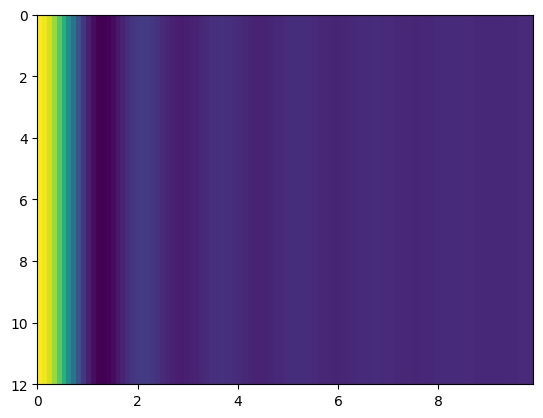

In [ ]:
heatmap = [observable.results for observable in results['exp_vals'][0::-2]]

fig, ax = plt.subplots(1, 1)
im = plt.imshow(heatmap, aspect="auto", extent=(0, 9.9, L, 0))

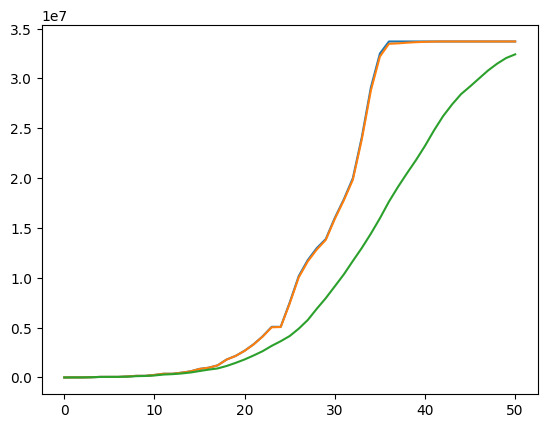

In [ ]:
filename = "results_gamma_0.pickle"
with open(filename, 'rb') as f:
    results = pickle.load(f)
plt.plot(results['exp_vals'][-1].results)

filename = "results_gamma_1.pickle"
with open(filename, 'rb') as f:
    results = pickle.load(f)
plt.plot(results['exp_vals'][-1].results)

filename = "results_gamma_2.pickle"
with open(filename, 'rb') as f:
    results = pickle.load(f)
plt.plot(results['exp_vals'][-1].results)